In [98]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib as mpl, matplotlib.pyplot as plt

In [105]:
# Read in all the data:
points = pd.read_csv("ddG_data.csv", sep=",")
linreg = pd.read_csv("linreg_results.csv", sep=',')

print(points, "\n")
print(linreg)

  mutant  SEC_mean   SEC_std  Cell_mean  Cell_std  Tat_mean   Tat_std  \
0     WT  0.000000  0.129435   0.000000  0.000000  0.000000  0.000000   
1     0U  2.015078  0.192881   2.359649  0.233021  1.890166  0.231087   
2     1U  1.428403  0.249996   0.689239  0.362317  1.172977  0.165003   
3     2U  0.356563  0.036651  -0.090742  0.165268 -0.657760  0.051395   
4     3U       NaN       NaN  -0.116109  0.155750 -0.148207  0.141106   
5     4U  0.868297  0.030411   0.067341  0.149820  0.055574  0.140095   
6     5U       NaN       NaN   0.169074  0.096713  0.313307  0.123112   
7     6U  0.617148  0.123037   0.617471  0.235263  0.524093  0.229848   
8     7U  0.995472  0.179624   1.044105  0.232349  0.385235  0.157894   

   Stack_mean  
0    0.000000  
1         NaN  
2         NaN  
3   -1.122680  
4   -0.298990  
5    0.228036  
6    0.421704  
7    0.469123  
8    0.271108   

         type  best_m   best_c  ci_m_lb  ci_m_ub  ci_c_lb  ci_c_ub
0    cell_tat  0.9399  0.15750   0.7712 

In [106]:
# Create color maps for mutants:
colors = ["black", "red", "goldenrod", "gold", "green", "turquoise", "blue", "purple", "magenta"]
points["colors"] = colors

5    0.949
Name: best_m, dtype: float64


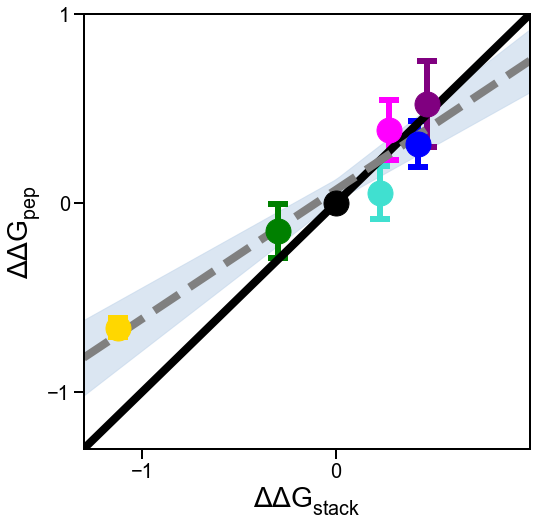

In [107]:
# ddG_stack vs ddG_pep:

# Select out data to plot:
d = points.loc[:, ["Stack_mean", "Tat_mean", "Tat_std", "colors"]].dropna()

# Create figure:
fig, ax = plt.subplots(figsize=(8,8))

# Plot each point:
for i, row in d.iterrows():
    x = row["Stack_mean"]
    y = row["Tat_mean"]
    #x_err = row["SEC_std"]
    y_err = row["Tat_std"]
    ax.errorbar(x=x, y=y, marker="o", markersize=25, ls="", 
            yerr=y_err, ecolor=row["colors"], elinewidth=6,
            capsize=10, capthick=6, color=row["colors"])

# Format plot parameters:
ax.set_xlim([-1.3, 1])
ax.set_ylim([-1.3, 1])
plt.rcParams["font.family"] = "arial"
mpl.rcParams['mathtext.default'] = 'regular'
ax.set_xlabel(r"$\Delta \Delta G_{stack}$", fontsize=28)
ax.set_ylabel(r"$\Delta \Delta G_{pep}$", fontsize=28)
ax.set_xticks([-1, 0])
ax.set_yticks([-1, 0, 1])
ax.tick_params(axis='both', which='major', labelsize=20, length=10, width=2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

print(linreg.loc[linreg["type"] == tp]["best_m"])
    
# Read regression results from csv file:
tp = "tat_stack"
m_ub = linreg.loc[linreg["type"] == tp]["ci_m_ub"]
m_lb = linreg.loc[linreg["type"] == tp]["ci_m_lb"]
c_ub = linreg.loc[linreg["type"] == tp]["ci_c_ub"]
c_lb = linreg.loc[linreg["type"] == tp]["ci_c_lb"]
m = linreg.loc[linreg["type"] == tp]["best_m"]
c = linreg.loc[linreg["type"] == tp]["best_c"]

# Shade area covered by 95% CI:
x = np.linspace(-1.5, 1, 100)
y_ub1 = m_ub.iloc[0] * x + c_ub.iloc[0]
y_lb1 = m_lb.iloc[0] * x + c_lb.iloc[0]
#ax.fill_between(x, y_ub, y_lb, interpolate=True, color="#b9cfe7", alpha=0.5)
x = np.linspace(-1.5, 1, 100)
y_ub2 = m_ub.iloc[0] * x + c_lb.iloc[0]
y_lb2 = m_lb.iloc[0] * x + c_ub.iloc[0]
y_ubf = np.maximum.reduce([y_ub1, y_ub2, y_lb1, y_lb2])
y_lbf = np.minimum.reduce([y_ub1, y_ub2, y_lb1, y_lb2])
ax.fill_between(x, y_ubf, y_lbf, interpolate=True, color="#b9cfe7", alpha=0.5)


# Plot regression line and y=x line:
ax.plot([-1.3,1], [-1.3,1], ls="-", color="k", linewidth=8)
ax.plot([-1.3, 1], [-1.3*m+c, 1*m+c], ls="--", color="grey", linewidth=8)
#plt.savefig("Fig_2e_ddG_correlation_stack_vs_pep.pdf")

4    0.6834
Name: best_m, dtype: float64


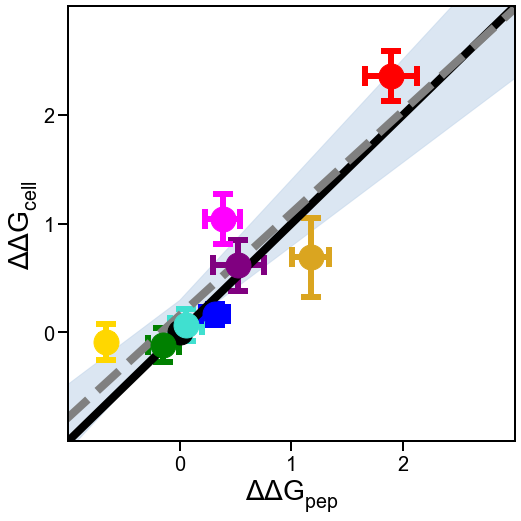

In [108]:
# ddG_pep vs ddG_cell:

# Select out data to plot:
d = points.loc[:, ["Tat_mean", "Tat_std", "Cell_mean", "Cell_std", "colors"]].dropna()

# Create figure:
fig, ax = plt.subplots(figsize=(8,8))

# Plot each point:
for i, row in d.iterrows():
    x = row["Tat_mean"]
    y = row["Cell_mean"]
    x_err = row["Tat_std"]
    y_err = row["Cell_std"]
    ax.errorbar(x=x, y=y, marker="o", markersize=25, ls="", xerr=x_err,
            yerr=y_err, ecolor=row["colors"], elinewidth=6,
            capsize=10, capthick=6, color=row["colors"])

# Format plot parameters:
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.rcParams["font.family"] = "arial"
mpl.rcParams['mathtext.default'] = 'regular'
ax.set_xlabel(r"$\Delta \Delta G_{pep}$", fontsize=28)
ax.set_ylabel(r"$\Delta \Delta G_{cell}$", fontsize=28)
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.tick_params(axis='both', which='major', labelsize=20, length=10, width=2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

print(linreg.loc[linreg["type"] == tp]["best_m"])
    
# Read regression results from csv file:
tp = "cell_tat"
m_ub = linreg.loc[linreg["type"] == tp]["ci_m_ub"]
m_lb = linreg.loc[linreg["type"] == tp]["ci_m_lb"]
c_ub = linreg.loc[linreg["type"] == tp]["ci_c_ub"]
c_lb = linreg.loc[linreg["type"] == tp]["ci_c_lb"]
m = linreg.loc[linreg["type"] == tp]["best_m"]
c = linreg.loc[linreg["type"] == tp]["best_c"]

# Shade area covered by 95% CI:
x = np.linspace(-1.5, 3, 100)
y_ub1 = m_ub.iloc[0] * x + c_ub.iloc[0]
y_lb1 = m_lb.iloc[0] * x + c_lb.iloc[0]
#ax.fill_between(x, y_ub, y_lb, interpolate=True, color="#b9cfe7", alpha=0.5)
x = np.linspace(-1.5, 3, 100)
y_ub2 = m_ub.iloc[0] * x + c_lb.iloc[0]
y_lb2 = m_lb.iloc[0] * x + c_ub.iloc[0]
y_ubf = np.maximum.reduce([y_ub1, y_ub2, y_lb1, y_lb2])
y_lbf = np.minimum.reduce([y_ub1, y_ub2, y_lb1, y_lb2])
ax.fill_between(x, y_ubf, y_lbf, interpolate=True, color="#b9cfe7", alpha=0.5)

# Plot regression line and y=x line:
ax.plot([-1.3,3], [-1.3,3], ls="-", color="k", linewidth=8)
ax.plot([-1.3, 3], [-1.3*m+c, 3*m+c], ls="--", color="grey", linewidth=8)
#plt.savefig("Fig_3c_ddG_correlation_prot_vs_cell.pdf")

0    0.9399
Name: best_m, dtype: float64


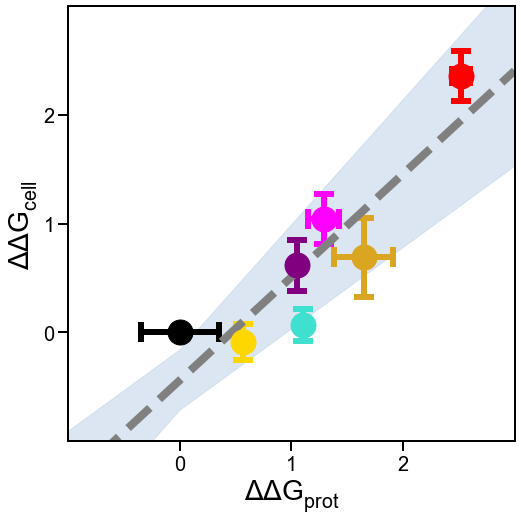

In [109]:
# ddG_pep vs ddG_cell:

# Select out data to plot:
d = points_V2.loc[:, ["SEC_mean", "SEC_std", "Cell_mean", "Cell_std", "colors"]].dropna()

# Create figure:
fig, ax = plt.subplots(figsize=(8,8))

# Plot each point:
for i, row in d.iterrows():
    x = row["SEC_mean"]
    y = row["Cell_mean"]
    x_err = row["SEC_std"]
    y_err = row["Cell_std"]
    ax.errorbar(x=x, y=y, marker="o", markersize=25, ls="", xerr=x_err,
            yerr=y_err, ecolor=row["colors"], elinewidth=6,
            capsize=10, capthick=6, color=row["colors"])

# Format plot parameters:
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.rcParams["font.family"] = "arial"
mpl.rcParams['mathtext.default'] = 'regular'
ax.set_xlabel(r"$\Delta \Delta G_{prot}$", fontsize=28)
ax.set_ylabel(r"$\Delta \Delta G_{cell}$", fontsize=28)
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.tick_params(axis='both', which='major', labelsize=20, length=10, width=2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

print(linreg.loc[linreg["type"] == tp]["best_m"])
    
# Read regression results from csv file:
tp = "cell_sec"
m_ub = linreg.loc[linreg["type"] == tp]["ci_m_ub"]
m_lb = linreg.loc[linreg["type"] == tp]["ci_m_lb"]
c_ub = linreg.loc[linreg["type"] == tp]["ci_c_ub"]
c_lb = linreg.loc[linreg["type"] == tp]["ci_c_lb"]
m = linreg.loc[linreg["type"] == tp]["best_m"]
c = linreg.loc[linreg["type"] == tp]["best_c"]

# Shade area covered by 95% CI:
x = np.linspace(-1.5, 3, 100)
y_ub1 = m_ub.iloc[0] * x + c_ub.iloc[0]
y_lb1 = m_lb.iloc[0] * x + c_lb.iloc[0]
#ax.fill_between(x, y_ub, y_lb, interpolate=True, color="#b9cfe7", alpha=0.5)
x = np.linspace(-1.5, 3, 100)
y_ub2 = m_ub.iloc[0] * x + c_lb.iloc[0]
y_lb2 = m_lb.iloc[0] * x + c_ub.iloc[0]
y_ubf = np.maximum.reduce([y_ub1, y_ub2, y_lb1, y_lb2])
y_lbf = np.minimum.reduce([y_ub1, y_ub2, y_lb1, y_lb2])
ax.fill_between(x, y_ubf, y_lbf, interpolate=True, color="#b9cfe7", alpha=0.5)


# Plot regression line and y=x line:
#ax.plot([-1.3,3], [-1.3,3], ls="-", color="k", linewidth=8)
ax.plot([-1.3, 3], [-1.3*m+c, 3*m+c], ls="--", color="grey", linewidth=8)
#plt.savefig("Fig_3c_ddG_correlation_pep_vs_cell.pdf")